In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
import os
from dotenv import load_dotenv


load_dotenv()
TEST_CSV_PATH = os.getenv('TEST_CSV')
PREPROCESSED_TESTING_PATH = os.getenv('PRE_PROCESSED_TEST_IMAGES')
MODEL_PATH = os.getenv('MODEL')


In [3]:
model = tf.keras.models.load_model(MODEL_PATH)

In [4]:
test_df = pd.read_csv(TEST_CSV_PATH)

In [15]:
def predict_image(test_df, PREPROCESSED_TESTING_PATH, model):
    total_testing_image = len(test_df)
    image_number = int(input(f"Enter the number between 0 and {total_testing_image}: "))
    
    if image_number < 1 or image_number > total_testing_image:
        print(f"Please enter a valid number between 1 and {total_testing_image}")
        return
    
    
    selected_value = test_df.iloc[image_number - 1, test_df.columns.get_loc('id_code')]

       
    image_path = PREPROCESSED_TESTING_PATH + '\\' + str(selected_value) + '.png'


    img = Image.open(image_path)
    img = img.resize((256, 256))  

    
    img_array = np.array(img)

   
    img_array = img_array / 255.0

   
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)

    
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

  
    print("Predicted class:", np.argmax(predictions))



1/1 [==============================] - 0s 28ms/step


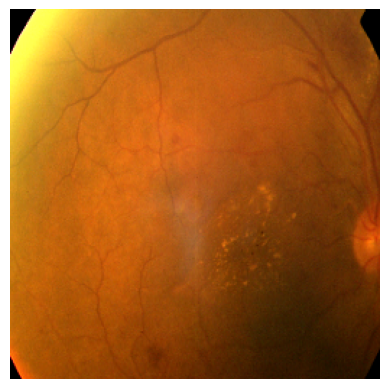

Predicted class: 0


In [22]:
predict_image(test_df,PREPROCESSED_TESTING_PATH,model)

In [23]:
def predict_and_store(test_df, PREPROCESSED_TESTING_PATH, model):
    predictions_list = []

    for idx, row in test_df.iterrows():
    
        selected_value = row['id_code']
        image_path = PREPROCESSED_TESTING_PATH + '\\' + str(selected_value) + '.png'

       
        img = Image.open(image_path)
        img = img.resize((256, 256))  

      
        img_array = np.array(img)
        img_array = img_array / 255.0

        img_array = np.expand_dims(img_array, axis=0)

        
        predictions = model.predict(img_array)

        
        predicted_class = np.argmax(predictions)

        
        predictions_list.append({'image_name': selected_value, 'predicted_class': predicted_class})

    predictions_df = pd.DataFrame(predictions_list)

    return predictions_df

In [24]:
predictions_df = predict_and_store(test_df, PREPROCESSED_TESTING_PATH, model)


1/1 [==============================] - 0s 21ms/step


In [25]:
predictions_df.head(5)

,image_name,predicted_class
0,0005cfc8afb6,0
1,003f0afdcd15,2
2,006efc72b638,0
3,00836aaacf06,2
4,009245722fa4,2


In [26]:
def plot_predictions_histogram(predictions_df):
    predicted_classes = predictions_df['predicted_class']
    plt.figure(figsize=(10, 6))
    plt.hist(predicted_classes, bins=len(predicted_classes.unique()), edgecolor='black', alpha=0.7)
    plt.title('Distribution of Predicted Classes')
    plt.xlabel('Predicted Class')
    plt.ylabel('Frequency')
    plt.xticks(range(min(predicted_classes), max(predicted_classes) + 1))
    plt.grid(True)
    plt.show()

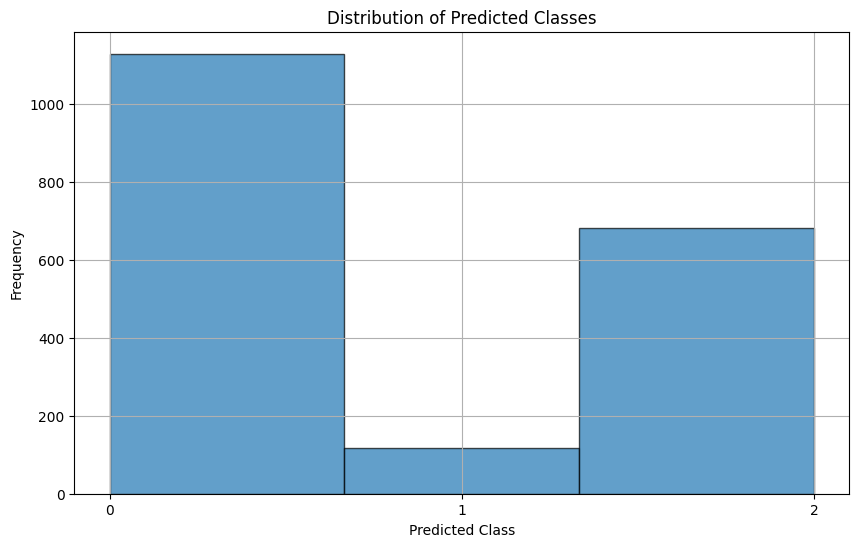

In [27]:
plot_predictions_histogram(predictions_df)